In [34]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Data Visualization
import seaborn as sns, pandas as pd

# Performance check
import timeit

In [35]:
# Generate Random Data
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,1.026808,0.002027
1,0.563814,2.565820
2,0.774290,0.266509
3,3.106029,3.166132
4,0.394532,1.903993


In [36]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 3, criterion='maxclust')

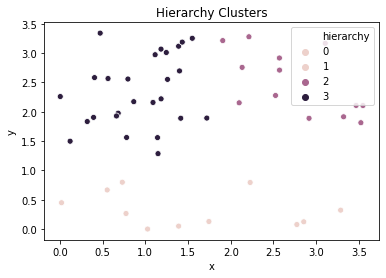

In [37]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [45]:
# Calculate Centroids with kmeans
centroids, distortion = kmeans(df, 3)

# Add label to DataFrame
df['kmeans'], df['distortion'] = vq(df, centroids)

# mean centroids in k-means
df[['x', 'y', 'kmeans']].groupby('kmeans').mean()

,x,y
kmeans,,
0,0.936486,2.347109
1,1.580172,0.335431
2,2.761187,2.484135


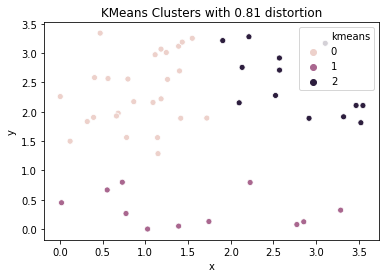

In [47]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title(f'KMeans Clusters with {round(distortion, 2)} distortion')
plt.show()


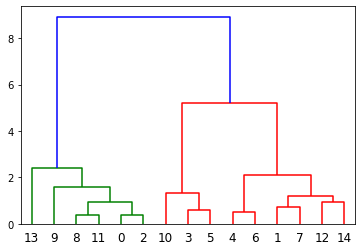

In [40]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()